# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [4]:
dataset = pd.DataFrame(dataset)

In [5]:
dataset['Cluster'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

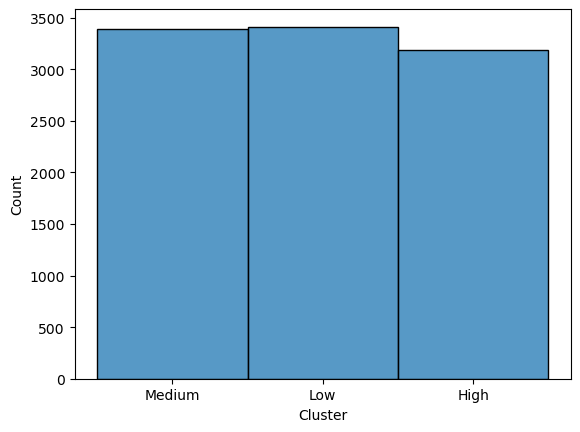

In [7]:
sns.histplot(dataset['Cluster'])

# **Split Data and Encoder**

In [8]:
encoder = LabelEncoder()
X = dataset.drop(['Order ID','Cluster','Discount','Sales','profit_margin','Profit','Sub Category','State'],axis=1)

y = dataset['Cluster']

In [9]:
columns_used = X.columns

In [10]:
for col in columns_used :
    X[col] = encoder.fit_transform(X[col])

for col in columns_used:
    X[col] = X[col].round(2)

X.head()


,Customer Name,Category,City,Order Date,Region
0,12,5,21,539,2
1,37,1,8,539,3
2,14,3,13,226,4
3,15,4,4,439,3
4,28,3,12,439,3


In [11]:
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

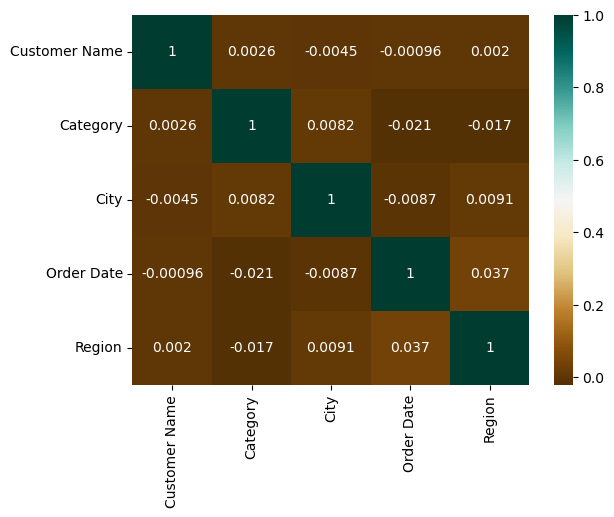

In [12]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

<AxesSubplot:>

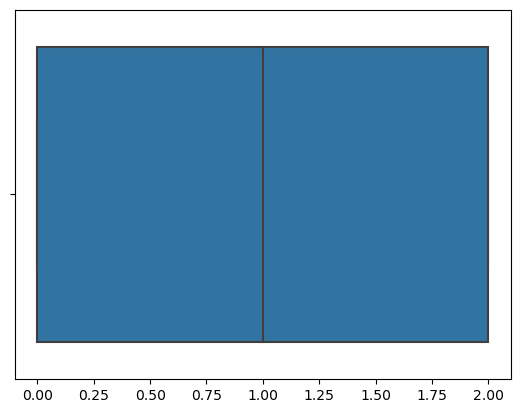

In [13]:
sns.boxplot(x=y)

<AxesSubplot:ylabel='Count'>

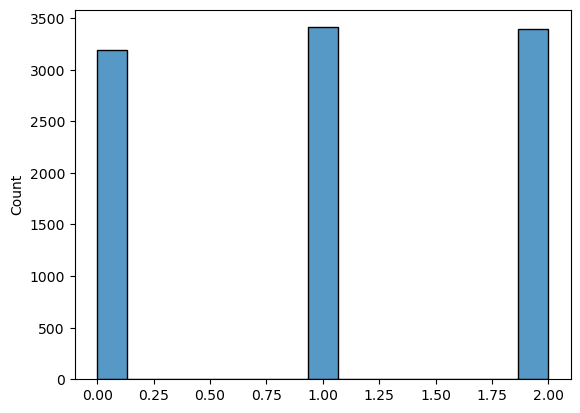

In [14]:
sns.histplot(y)

In [15]:
# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7995, 5)
Dimension of Test set (1999, 5) 

Number of numeric features: 5


# **SVM**

In [16]:
svm_model = SVC(kernel='linear', gamma=0.001, C=70)
svm_model.fit(X_train, y_train)

SVC(C=70, gamma=0.001, kernel='linear')

In [17]:
import joblib
joblib.dump(svm_model, 'model/svm_model.pkl')

['model/svm_model.pkl']

In [18]:
Y_test_label = list(encoder.inverse_transform(y_test))

final_model = svm_model
Y_pred = final_model.predict(X_test)
Y_pred = list(encoder.inverse_transform(Y_pred))

In [19]:
print(confusion_matrix(Y_test_label,Y_pred))
print("\n")
print(classification_report(Y_test_label,Y_pred))

[[  0 324 318]
 [  0 340 358]
 [  0 291 368]]


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       642
         Low       0.36      0.49      0.41       698
      Medium       0.35      0.56      0.43       659

    accuracy                           0.35      1999
   macro avg       0.24      0.35      0.28      1999
weighted avg       0.24      0.35      0.29      1999



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
